# Analyzing Click Through Rate

### Click Through Rate is defined as the number of clicks a user makes per impression that is made upon the user.
### Determine if there is statistically significant difference between the mean CTR on the New York Times website for the following groups:

    - Signed in users v. Not signed in users
    
        (H0: Signedin CTR = Not Signedin CTR, H1: Signedin CTR != Not Signedin CTR)
        
    - Male v. Female users
    
        (H0: Male CTR = Female CTR, H1: Male CTR != Female CTR)
        
    - Each of 7 age groups against each other (21 tests in total)
    
        (H0: Age1 CTR = Age2 CTR, H1: Age1 CTR != Age2 CTR)

#### Set alpha

In [1]:
# significance .05 adjusted for multiple testing
alpha = 0.05 / 23 # .0021

#### Load data

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('data/nyt1.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458441 entries, 0 to 458440
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   Age          458441 non-null  int64
 1   Gender       458441 non-null  int64
 2   Impressions  458441 non-null  int64
 3   Clicks       458441 non-null  int64
 4   Signed_In    458441 non-null  int64
dtypes: int64(5)
memory usage: 17.5 MB


In [48]:
# create a CTR column
# remove rows with zero impressions
data = data[data['Impressions'] != 0]
data['CTR'] = data['Clicks'] / data['Impressions']

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_hist(df, title, color):
    df.hist(figsize=(12,10), grid=False, normed=True, color=color, alpha=.2)
    plt.suptitle(title, size=16, weight='bold')

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:434: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(data[col].dropna().values, bins=bins, **kwds)


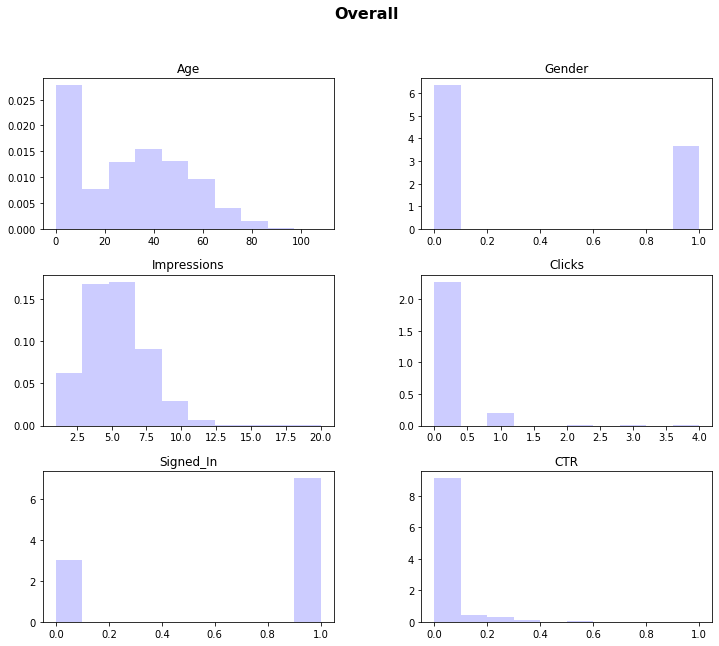

In [50]:
plot_hist(data, 'Overall', 'b')

## Signed in users v. Not signed in users

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:434: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(data[col].dropna().values, bins=bins, **kwds)


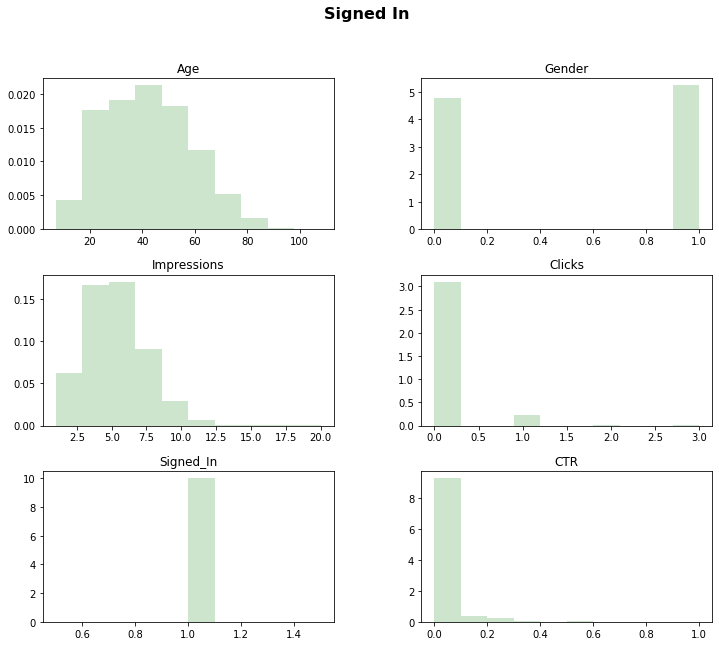

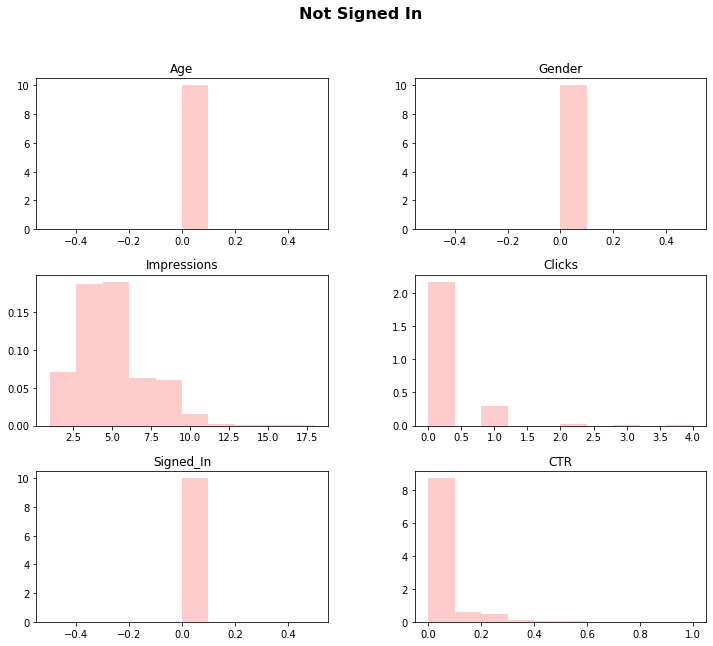

In [51]:
# Making 2 dataframes, with signed and non-signed in users
signin_data = data[data['Signed_In'] == 1]
notsignin_data = data[data['Signed_In'] == 0]
    
plot_hist(signin_data, 'Signed In', 'g')
plot_hist(notsignin_data, 'Not Signed In', 'r')

In [52]:
import scipy.stats as scs

In [95]:
def t_test(gp1_df, gp2_df, gp1_name, gp2_name):
    fig = plt.figure(figsize=(15,6))
    gp1_mean = gp1_df['CTR'].mean()
    gp2_mean = gp2_df['CTR'].mean()
    print(f'{gp1_name} Mean CTR: {gp1_mean}')
    print(f'{gp2_name} Mean CTR: {gp2_mean}')
    print(f'Difference in Mean: {abs(gp2_mean-gp1_mean)}')
    
    p_val = scs.ttest_ind(gp1_df['CTR'], gp2_df['CTR'], equal_var=False)[1]
    print(f'p-value is: {p_val}')
    if p_val < alpha:
        print(f'{gp1_name} CTR and {gp2_name} CTR ARE statistically different')
    else:
         print(f'{gp1_name} CTR and {gp2_name} CTR ARE NOT statistically different')
    
    
    gp1_df['CTR'].hist(normed=True, grid=False, bins=50, label=gp1_name, color='g', alpha=0.3)
    gp2_df['CTR'].hist(normed=True, grid=False, bins=50, label=gp2_name, color='r', alpha=0.3)
    plt.axvline(gp1_mean, color='g', alpha=0.6, lw=2)
    plt.axvline(gp2_mean, color='r', alpha=0.6, lw=2)
    
    plt.ylabel('Probability Density')
    plt.xlabel('CTR')
    plt.legend()

Signed In Mean CTR: 0.01425363523213594
Not Signed In Mean CTR: 0.028354907061657893
Difference in Mean: 0.014101271829521953
p-value is: 0.0
Signed In CTR and Not Signed In CTR ARE statistically different


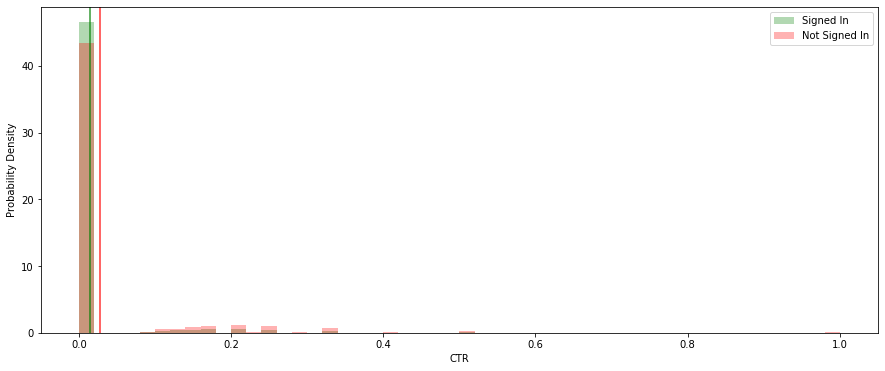

In [96]:
t_test(signin_data, notsignin_data, 'Signed In', 'Not Signed In')

## Male v. Female

M Mean CTR: 0.01391852429759764
F Mean CTR: 0.014622012183866056
Difference in Mean: 0.0007034878862684155
p-value is: 0.0010028527313147612
M CTR and F CTR ARE statistically different


/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:329: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


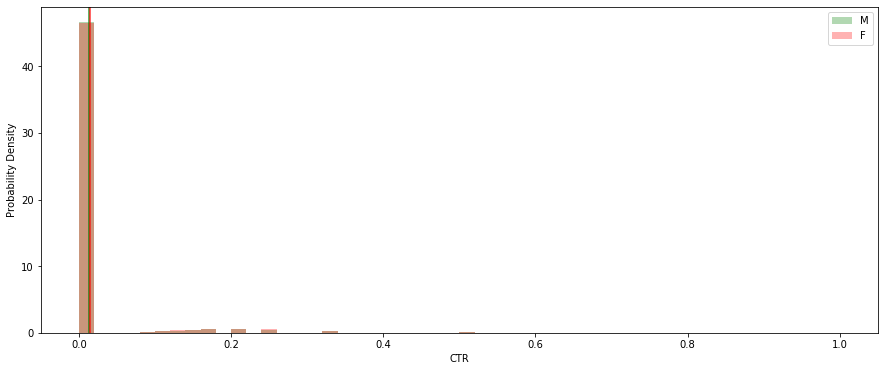

In [97]:
male = signin_data[signin_data['Gender']==1]
female = signin_data[signin_data['Gender']==0]
t_test(male, female, 'M', 'F')

## Age Group

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'Number of users')

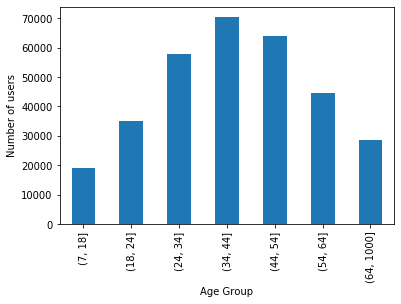

In [56]:
bins = [7, 18, 24, 34, 44, 54, 64, 1000]
signin_data['age_groups'] = pd.cut(signin_data['Age'], bins)

signin_data['age_groups'].value_counts().sort_index().plot(kind='bar', grid=False)
plt.xlabel('Age Group')
plt.ylabel('Number of users')

In [74]:
results = pd.DataFrame()
from itertools import combinations
combos = combinations(pd.unique(signin_data['age_groups']),2)

In [75]:
for age1, age2 in combos:
    ctr1 = signin_data[signin_data['age_groups'] == age1]['CTR']
    ctr2 = signin_data[signin_data['age_groups'] == age2]['CTR']
    p_val = scs.ttest_ind(ctr1, ctr2, equal_var=False)[1]
    ctr1_mean = ctr1.mean()
    ctr2_mean = ctr2.mean()
    diff = abs(ctr1_mean - ctr2_mean)
    results = results.append(
        dict(
            one=age1,
            two=age2,
            mean1=ctr1_mean,
            mean2=ctr2_mean,
            diff=diff,
            p=p_val
        ),
        ignore_index=True
    )
    
results = results[['one','two','mean1','mean2','diff','p']]
results[results['p'] < alpha].sort_values('diff', ascending=False)

,one,two,mean1,mean2,diff,p
10,"(64.0, 1000.0]","(18.0, 24.0]",0.029803,0.009720,0.020082,2.458627e-272
8,"(64.0, 1000.0]","(44.0, 54.0]",0.029803,0.009958,0.019845,1.430923e-295
7,"(64.0, 1000.0]","(24.0, 34.0]",0.029803,0.010146,0.019656,7.860398e-285
0,"(34.0, 44.0]","(64.0, 1000.0]",0.010286,0.029803,0.019516,5.245541e-288
22,"(7.0, 18.0]","(18.0, 24.0]",0.026585,0.009720,0.016865,6.900980e-144
18,"(44.0, 54.0]","(7.0, 18.0]",0.009958,0.026585,0.016628,4.014382e-151
14,"(24.0, 34.0]","(7.0, 18.0]",0.010146,0.026585,0.016439,7.449266e-146
3,"(34.0, 44.0]","(7.0, 18.0]",0.010286,0.026585,0.016299,4.575147e-146
25,"(18.0, 24.0]","(54.0, 64.0]",0.009720,0.020307,0.010586,1.007813e-130
20,"(44.0, 54.0]","(54.0, 64.0]",0.009958,0.020307,0.010349,2.525271e-151


**Age groups 64-999, 54-63, and 7-17 all have significantly greater CTR. The oldest 2, and the youngest groups are most likely to click through.**

In [79]:
results[results['p'] > alpha].sort_values('diff', ascending=True)

,one,two,mean1,mean2,diff,p
1,"(34.0, 44.0]","(24.0, 34.0]",0.010286,0.010146,0.000140,0.624662
13,"(24.0, 34.0]","(44.0, 54.0]",0.010146,0.009958,0.000189,0.514689
19,"(44.0, 54.0]","(18.0, 24.0]",0.009958,0.009720,0.000237,0.477902
2,"(34.0, 44.0]","(44.0, 54.0]",0.010286,0.009958,0.000329,0.233928
15,"(24.0, 34.0]","(18.0, 24.0]",0.010146,0.009720,0.000426,0.213658
4,"(34.0, 44.0]","(18.0, 24.0]",0.010286,0.009720,0.000566,0.087470


**The differences in CTR among 18-23, 24-33, 34-43 and 44-53 are not significant. The users aged from 18 - 54 click through at a similair rate.**